# Genders for awards?

A gut-check and prediction from looking at a few samples is that historically **male authors** dominated awards. But recently it seems there's been a correction and now **female authors** tend to win. Is that true?

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns=None

In [7]:
nomineeDF = pd.read_csv('nominees_stats_awards_all.csv')
nomineeDF.columns

Index(['Unnamed: 0', 'bookID', 'asin', 'isbn', 'bookTitle', 'authorName',
       'bookLink', 'format', 'num_pages', 'languages', 'date_published',
       'publication_year', 'publisher', 'description', 'author_bio', 'gender',
       'average_rating', 'ratings_count', 'text_reviews_count',
       'author_followers', 'goodreads_author', 'book_series', 'award',
       'Nominee', 'Winner', 'AwardCategory', 'AwardEntity', 'HugoAward',
       'LocusAward', 'NebulaAward', 'BestNovel', 'BestNovelette',
       'BestNovella', 'BestShortStory', 'BestArtBook', 'BestNonFiction',
       'BestCollection', 'BestAnthology', 'BestNewWriter',
       'BestYoungAdultBook', 'BestGraphicStory', 'BestSpecialAward',
       'BestSeries', 'BestShortFiction', 'BestOther'],
      dtype='object')

In [8]:
nomineeDF.head(1)

,Unnamed: 0,bookID,asin,isbn,bookTitle,authorName,bookLink,format,num_pages,languages,date_published,publication_year,publisher,description,author_bio,gender,average_rating,ratings_count,text_reviews_count,author_followers,goodreads_author,book_series,award,Nominee,Winner,AwardCategory,AwardEntity,HugoAward,LocusAward,NebulaAward,BestNovel,BestNovelette,BestNovella,BestShortStory,BestArtBook,BestNonFiction,BestCollection,BestAnthology,BestNewWriter,BestYoungAdultBook,BestGraphicStory,BestSpecialAward,BestSeries,BestShortFiction,BestOther
0,0,43466735,NaN,NaN,"Fireside Magazine Issue 52, February 2018",Julia Rios,/book/show/43466735-fireside-magazine-issue-52...,ebook,NaN,English,February 2018,2018.0,Fireside Fiction,"In this issue: — ""Dust to Dust,"" by Mary Robin...","Julia Rios writes all sorts of things, and edi...",female,3.84,237,58,30,1,0,"Nebula Award for Short Story for ""The Secret L...",1,1,Best Short Story,Nebula,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
nominees = nomineeDF[nomineeDF['Nominee']==1][['bookID','publication_year','gender','AwardEntity']]
nominees.count()

bookID              3590
publication_year    3588
gender              3590
AwardEntity         3590
dtype: int64

In [20]:
nomAwardTable = nominees.groupby(['publication_year','AwardEntity','gender']).bookID\
    .count().reset_index().rename(columns={'bookID':'bookCount'})
nomAwardTable

,publication_year,AwardEntity,gender,bookCount
0,1953.0,Hugo,male,1
1,1955.0,Hugo,male,4
2,1956.0,Hugo,female,1
3,1956.0,Hugo,male,8
4,1958.0,Hugo,male,2
...,...,...,...,...
316,2019.0,Hugo,male,19
317,2019.0,Locus,female,50
318,2019.0,Locus,male,67
319,2020.0,Hugo,female,11


In [75]:
type(nomAwardTable)

pandas.core.frame.DataFrame

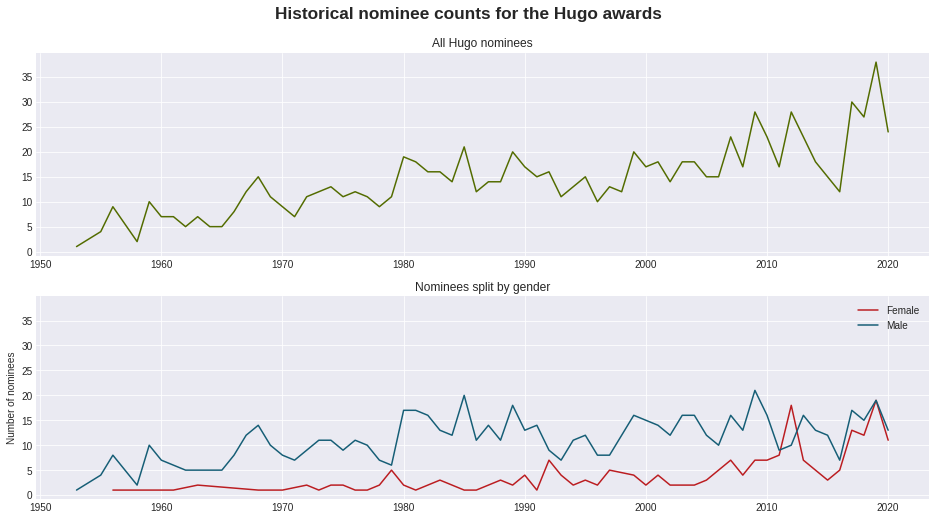

In [81]:
def pltAward(award):
    p0 = nomAwardTable[nomAwardTable['AwardEntity']==award]
    pF = p0[p0['gender']=='female']
    pM = p0[p0['gender']!='female']
    p1 = p0.groupby(['publication_year']).bookCount.sum().reset_index()
    
    plt.style.use('seaborn-darkgrid')
    palette = plt.get_cmap('Set1')
    fig,(ax0,ax1) = plt.subplots(2,1,sharey=True,figsize=(16,8))
    ax0.plot(p1.publication_year,p1.bookCount,color='#536C00')
    ax0.set_title('All {} nominees'.format(award))
    plt.ylabel('Number of nominees')
    
    ax1.plot(pF.publication_year,pF.bookCount,color='#BB1D21')
    ax1.plot(pM.publication_year,pM.bookCount,color='#165E76')
    ax1.legend(['Female','Male'])
    ax1.set_title('Nominees split by gender'.format(award))
    
    plt.subplots_adjust(top=0.9)
    plt.suptitle('Historical nominee counts for the {} awards'.format(award),size='xx-large',weight='bold')
    plt.show()
    fig.savefig('{}-nominees.png'.format(award))
    
    
pltAward('Hugo')



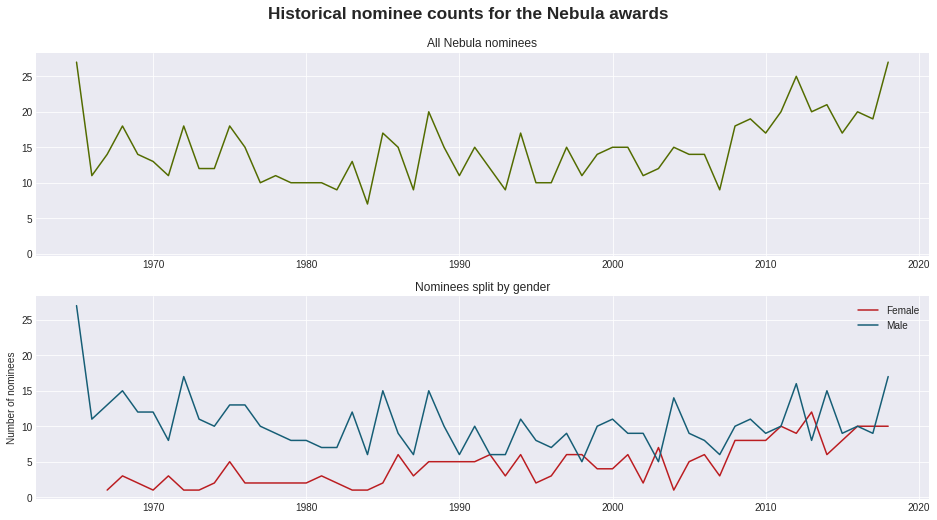

In [82]:
pltAward('Nebula')

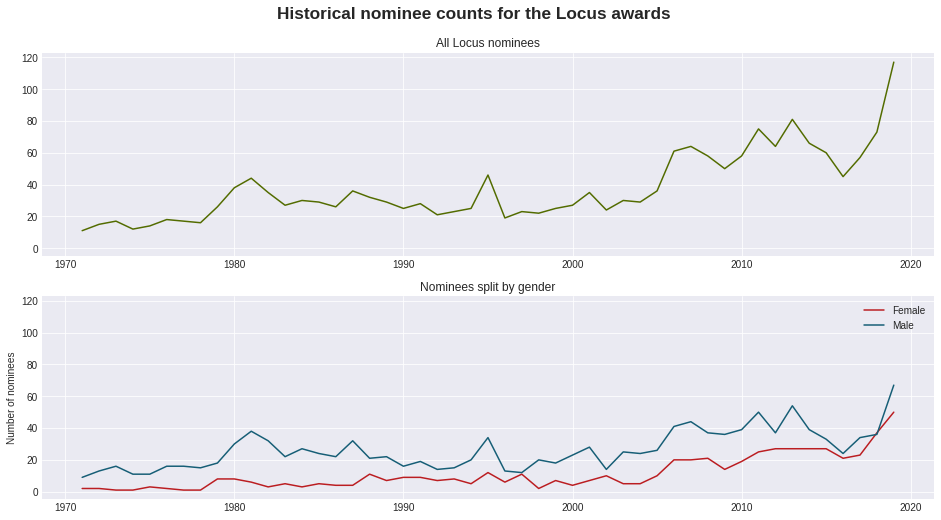

In [83]:
pltAward('Locus')

## Map winners



In [84]:
winners = nomineeDF[nomineeDF['Winner']==1][['bookID','publication_year','gender','AwardEntity']]
winners.count()

bookID              925
publication_year    923
gender              925
AwardEntity         925
dtype: int64

In [85]:
winTable = winners.groupby(['publication_year','AwardEntity','gender']).bookID\
    .count().reset_index().rename(columns={'bookID':'bookCount'})
winTable

,publication_year,AwardEntity,gender,bookCount
0,1953.0,Hugo,male,1
1,1955.0,Hugo,male,4
2,1956.0,Hugo,male,2
3,1958.0,Hugo,male,2
4,1959.0,Hugo,male,3
...,...,...,...,...
282,2018.0,Nebula,female,4
283,2019.0,Hugo,female,4
284,2019.0,Hugo,male,2
285,2019.0,Locus,female,9


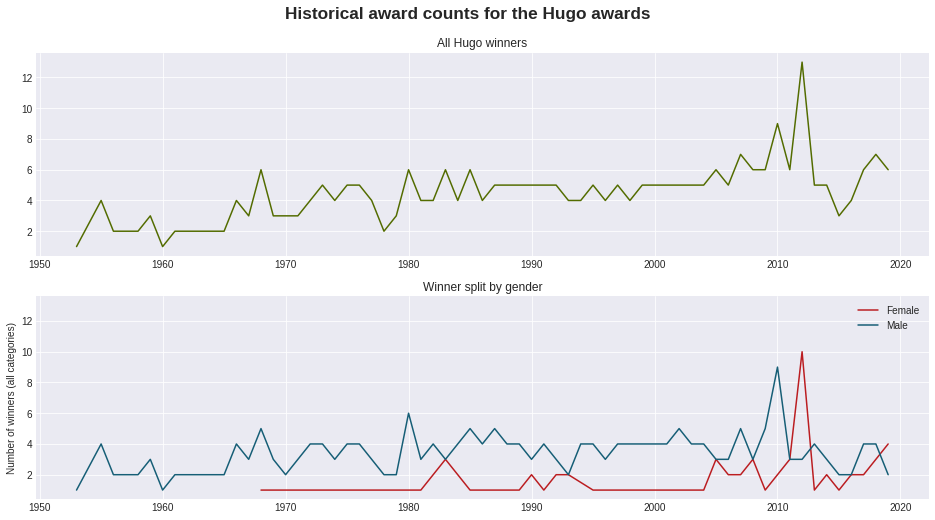

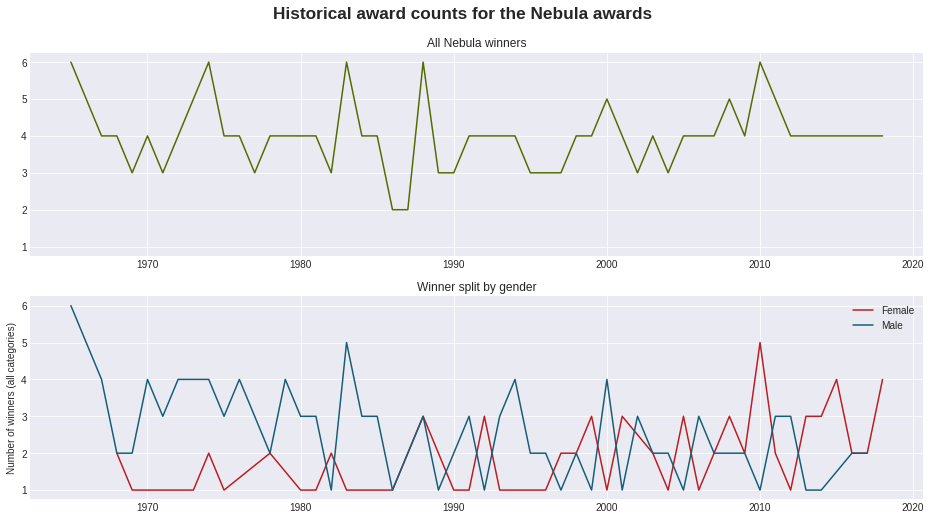

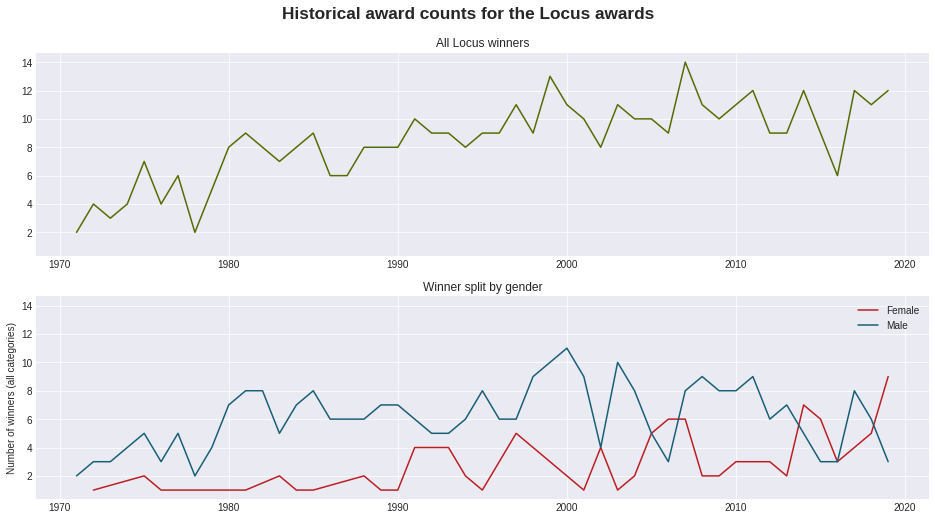

In [87]:
def pltAwardWin(award):
    p0 = winTable[winTable['AwardEntity']==award]
    pF = p0[p0['gender']=='female']
    pM = p0[p0['gender']!='female']
    p1 = p0.groupby(['publication_year']).bookCount.sum().reset_index()
    
    plt.style.use('seaborn-darkgrid')
    palette = plt.get_cmap('Set1')
    fig,(ax0,ax1) = plt.subplots(2,1,sharey=True,figsize=(16,8))
    ax0.plot(p1.publication_year,p1.bookCount,color='#536C00')
    ax0.set_title('All {} winners'.format(award))
    plt.ylabel('Number of winners (all categories)')
    
    ax1.plot(pF.publication_year,pF.bookCount,color='#BB1D21')
    ax1.plot(pM.publication_year,pM.bookCount,color='#165E76')
    ax1.legend(['Female','Male'])
    ax1.set_title('Winner split by gender'.format(award))
    
    plt.subplots_adjust(top=0.9)
    plt.suptitle('Historical award counts for the {} awards'.format(award),size='xx-large',weight='bold')
    plt.show()
    fig.savefig('{}-awards.png'.format(award))
    
    
pltAwardWin('Hugo')
pltAwardWin('Nebula')
pltAwardWin('Locus')

